<img src="./logo.png" style="width:1200px;height:250px"/>


## Ilum Escola de Ciência 
###  Curso: Análise Numérica
### Professor: Vinicius Wasques
### Aluno: Isabela Beneti
### Método do Trapézio

## Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Exercício 1

Considere a seguinte integral que modela o comprimento de uma chapa com formato ondulatório senoidal:

$\int_{0}^{48}\sqrt{1+cos^2(x)}dx$



##  a)  Utilize o método do trapézio par'a estimar o comprimento desta chapa no intervalo [0,48]. Esboce geometricamente o que está sendo feito.

Primeiro, vamos implementar a função da qual calcularemos a integral $\sqrt{1+cos^2(x)}$

In [2]:
def f(x):
    return np.sqrt(1 + np.cos(x)**2)

Agora, vamos definir uma função que calcula a integral pelo método do trapézio simples (calcula a área do trapézio cujas bases medem $f(a)$ e $f(b)$, e cuja altura mede $b-a$ , sendo a e b os limites da integral)

In [3]:
####### Definindo função que realiza o método do trapézio #######
def metodo_do_trapezio(f, a, b):
    """
    Argumentos: 
    f= função da qual a aproximação da integral será calculada
    a= limite inferior da integral
    b= limite superior da integral
    
    Retorna:
    
    Aproximação da integral pelo método do trapézio
    """
    h = abs(b - a)
    integral = (f(a) + f(b)) / 2 * h

    return integral

Testando essa função para a função do problema, temos o resultado:

In [4]:
# definindo valores dos limites inferior e superior
a = 0  # limite inferior
b = 48  # limite superior

integral_trapezio = metodo_do_trapezio(f, a, b)
print("Estimativa da integral pelo método do trapézio:", integral_trapezio)

Estimativa da integral pelo método do trapézio: 62.43737140065479


Agora, para ter um método com o qual comparar, vamos calcular essa mesma integral usando o `integrate.quad`, da bibloteca spicy, que utiliza um algoritmo de quadratura adaptativa para calcular a integral de uma função.

In [5]:
# calculando integral por outro método
integral_spicy= integrate.quad(f, a, b)
print("Estimativa da integral pelo método da biblioteca spicy:", integral_spicy[0])

Estimativa da integral pelo método da biblioteca spicy: 58.47046915489962


Então, o erro do método do trapézio calculado em relação ao método `integrate.quad` pode ser calculado por:

In [6]:
# calculando o erro do método do trapézio em relação ao outro método
erro_metodo_trapezio = abs(integral_spicy[0] - integral_trapezio)
print("O erro do método do trapézio foi de", erro_metodo_trapezio)

O erro do método do trapézio foi de 3.966902245755172


### Representação geométrica

Para esboçar geometricamente o que está sendo feito, podemos plotar o gráfico da função $f(x)$ e o trapézio ussado como aproximação da integral:

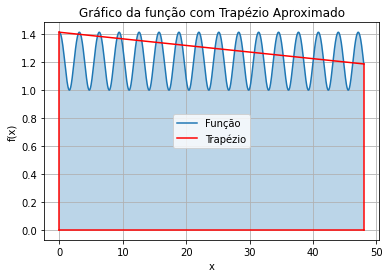

In [7]:
####### Plotando gráfico do método do trapézio #######

x = np.linspace(a, b, 1000)  # Pontos para plotar a função
y = f(x)  # Valores da função nos pontos x

# Plotar o gráfico da função
plt.plot(x, y, label='Função')
plt.fill_between(x, 0, y, alpha=0.3)

# Plotar o trapézio aproximado como integral
plt.plot([a, b], [0, 0], 'red', label='Trapézio')
plt.plot([a, a], [0, f(a)], 'red')
plt.plot([b, b], [0, f(b)],'red')
plt.plot([a, b], [f(a), f(b)],'red')

plt.title('Gráfico da função com Trapézio Aproximado')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

## b) Considere agora a partição P={0,12,24,36,48}. Utilize o método do trapézio composto para estimar o comprimento desta chapa no intervalo [0,48]. Esboce geometricamente o que está sendo feito.

Primeiramente, vamos definir uma função que calcula a integral pelo método do trapézio composto:

In [8]:
####### Definindo função que realiza o método do trapézio composto #######

def metodo_do_trapezio_composto(f, a, b, n):
    """
    Argumentos: 
    f= função da qual a aproximação da integral será calculada
    a= limite inferior da integral
    b= limite superior da integral
    n= número de trapézios
    
    Retorna:
    
    Aproximação da integral pelo método do trapézio composto
    """
    h = (b - a) / n
    integral = (f(a) + f(b)) / 2

    for i in range(1, n):
        x = a + i * h
        integral += f(x)

    integral *= h
    return integral

Aa partição dada pelo enunciado representa basicamente um método de trapézio composto em que n=4 (isto é, o número de trapézios é 4). Logo, testando essa função para a função do problema, temos o resultado:

In [9]:
n= 4
integral_trapezio_composto = metodo_do_trapezio_composto(f, a, b, n)
print("Estimativa da integral pelo método do trapézio composto:", integral_trapezio_composto)

Estimativa da integral pelo método do trapézio composto: 56.44375067617747


Então, o erro do método do trapézio composto calculado em relação ao método `integrate.quad` e a diferença entre esse erro e o erro do método do trapézio simples podem ser calculados por:

In [10]:
erro_metodo_trapezio_composto = abs(integral_spicy[0] - integral_trapezio_composto)
print("O erro do método do trapézio composto para", n, "trapézios foi de", erro_metodo_trapezio_composto)
print("ou seja, para", n, "trapézios, esse erro é cerca de", erro_metodo_trapezio/erro_metodo_trapezio_composto, "vezes menor que o erro do trapézio simples")

O erro do método do trapézio composto para 4 trapézios foi de 2.0267184787221453
ou seja, para 4 trapézios, esse erro é cerca de 1.9573030430236769 vezes menor que o erro do trapézio simples


### Representação geométrica

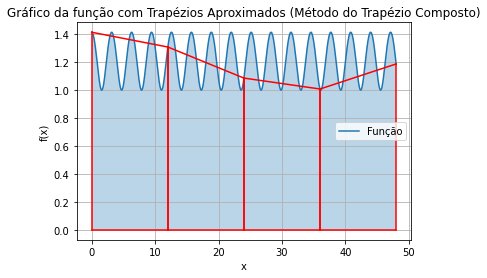

In [11]:
####### Plotando gráfico do método do trapézio composto #######

# Plotando o gráfico da função
plt.plot(x, y, label='Função')
plt.fill_between(x, 0, y, alpha=0.3)
p= 48/n
# Plotando os trapézios aproximados como integral
for i in range(n):
    a= (i)*(48/n)
    b= (i+1)*(48/n)
    plt.plot([a, b], [0, 0], 'red')
    plt.plot([a, a], [0, f(a)], 'red')
    plt.plot([b, b], [0, f(b)],'red')
    plt.plot([a, b], [f(a), f(b)],'red')
# voltando a e b para os "valores normais"
a = 0  # limite inferior
b = 48 # limite superior
plt.title('Gráfico da função com Trapézios Aproximados (Método do Trapézio Composto)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

### Observação

Para alguns valores de n (número de trapézios do método do trapézio composto), como n=3 e n=5, o resultado do método do trapézio composto é PIOR do que o resultado do método de trapézio simples, como mostram os códigos:

In [12]:
n= 5
integral_trapezio_composto = metodo_do_trapezio_composto(f, a, b, n)
erro_metodo_trapezio_composto = abs(integral_spicy[0] - integral_trapezio_composto)
print("O erro do método do trapézio composto para", n, "trapézios foi de", erro_metodo_trapezio_composto)
print("ou seja, para", n, "trapézios, esse erro é cerca de", erro_metodo_trapezio/erro_metodo_trapezio_composto, "vezes menor que o erro do trapézio simples")

O erro do método do trapézio composto para 5 trapézios foi de 5.436033545868419
ou seja, para 5 trapézios, esse erro é cerca de 0.7297420467116433 vezes menor que o erro do trapézio simples


In [13]:
n= 3
integral_trapezio_composto = metodo_do_trapezio_composto(f, a, b, n)
erro_metodo_trapezio_composto = abs(integral_spicy[0] - integral_trapezio_composto)
print("O erro do método do trapézio composto para", n, "trapézios foi de", erro_metodo_trapezio_composto)
print("ou seja, para", n, "trapézios, esse erro é cerca de", erro_metodo_trapezio/erro_metodo_trapezio_composto, "vezes menor que o erro do trapézio simples")

O erro do método do trapézio composto para 3 trapézios foi de 5.332008162662049
ou seja, para 3 trapézios, esse erro é cerca de 0.7439790271766319 vezes menor que o erro do trapézio simples
